This notebook visualizes a burst and saves the result as mp4.

Author: Mariia Lundvall (lundvm@uw.edu) <br>
Date: 07/04/2019

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
from matplotlib import rc

In [2]:
# read in spike data, spikes.csv is produced by the 05_extract_spike_data notebook
# update the path as needed
spikes = pd.read_csv("/home/NETID/lundvm/data/spikes.csv")

In [3]:
# extract burst-related spikes from the spikes dataframe
# values start and end indicate burst start and end time
# in this case the values were taken from the file produced by extract_spatiotemporal_avalanches.cpp
start = 102329823
end = 102400660
burst = spikes[(spikes['time_step'] >= start) & (spikes['time_step'] <= end)]

In [4]:
# prepare data for plotting
burst_data = burst['xloc'].groupby([burst.time_step]).apply(list).reset_index()
temp = burst['yloc'].groupby([burst.time_step]).apply(list).reset_index()
burst_data['yloc'] = temp['yloc']

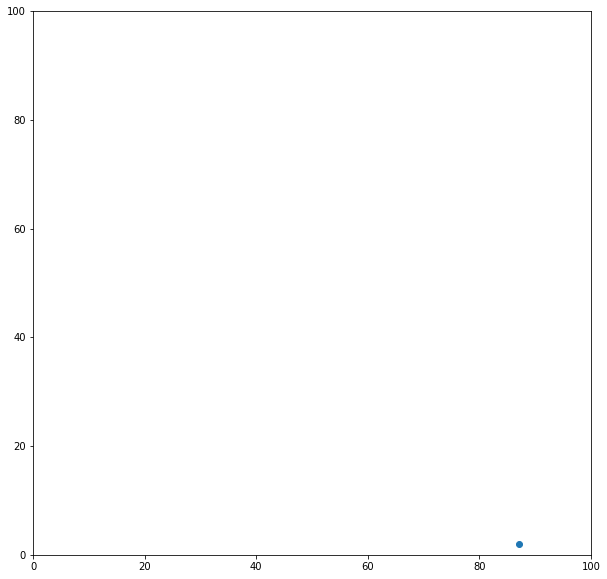

In [5]:
# create initial plot/frame
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(0, 100), ylim=(0, 100))
scat = ax.scatter(burst_data['xloc'].values[0], burst_data['yloc'].values[0])

In [6]:
def animate(i):
    y_i = burst_data['yloc'].values[i]
    x_i = burst_data['xloc'].values[i]
    scat.set_offsets(np.c_[x_i, y_i])
    return (scat,)

In [7]:
anim = FuncAnimation(fig, animate, frames=burst_data.shape[0], interval=20, blit=True)

In [8]:
HTML(anim.to_html5_video())

In [9]:
# save the animation as mp4
# update the path as needed
anim.save('/home/NETID/lundvm/data/merged_burst_nonstarter_test_070419.mp4')